In [1]:
from pymystem3 import Mystem
import pymorphy2
import string
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec
from gensim.models import KeyedVectors

import warnings
warnings.filterwarnings('ignore')

In [2]:
m = Mystem()
punctuation = string.punctuation

In [3]:
f = open('mumu.txt', encoding = 'utf-8')
text = f.read()
text = text.replace('\n', ' ')
text = text.replace('.', '.\n')

print(text)

В одной из отдаленных улиц Москвы в сером доме с белыми колоннами, антресолью[1] и покривившимся балконом жила некогда барыня, вдова, окруженная многочисленной дворней.
[2] Сыновья ее служили в Петербурге, дочери вышли замуж; она выезжала редко и уединенно доживала последние годы своей скупой и скучающей старости.
 День ее, нерадостный и ненастный, давно прошел; но и вечер ее был чернее ночи.
  Из числа всей ее челяди самым замечательным лицом был дворник Герасим, мужчина двенадцати вершков роста,[3] сложенный богатырем и глухонемой от рождения.
  Барыня взяла его из деревни, где он жил один, в небольшой избушке, отдельно от братьев, и считался едва ли не самым исправным тягловым мужиком.
[4] Одаренный необычайной силой, он работал за четверых – дело спорилось в его руках, и весело было смотреть на него, когда он либо пахал и, налегая огромными ладонями на соху, казалось, один, без помощи лошаденки, взрезывал упругую грудь земли, либо о Петров день так сокрушительно действовал косой, ч

In [4]:
processed_text = ''
for line in text.splitlines():
    line = ' '.join(word.strip(string.punctuation) for word in line.split())
    processed_text += line + '\n'
print(processed_text)

В одной из отдаленных улиц Москвы в сером доме с белыми колоннами антресолью[1 и покривившимся балконом жила некогда барыня вдова окруженная многочисленной дворней
2 Сыновья ее служили в Петербурге дочери вышли замуж она выезжала редко и уединенно доживала последние годы своей скупой и скучающей старости
День ее нерадостный и ненастный давно прошел но и вечер ее был чернее ночи
Из числа всей ее челяди самым замечательным лицом был дворник Герасим мужчина двенадцати вершков роста,[3 сложенный богатырем и глухонемой от рождения
Барыня взяла его из деревни где он жил один в небольшой избушке отдельно от братьев и считался едва ли не самым исправным тягловым мужиком
4 Одаренный необычайной силой он работал за четверых – дело спорилось в его руках и весело было смотреть на него когда он либо пахал и налегая огромными ладонями на соху казалось один без помощи лошаденки взрезывал упругую грудь земли либо о Петров день так сокрушительно действовал косой что хоть бы молодой березовый лесок смах

In [146]:
processed_text = processed_text.lower()
processed_text = processed_text.replace('\'', '')
processed_text = re.sub(r'[0-9]+', '', processed_text)
print(processed_text)

в одной из отдаленных улиц москвы в сером доме с белыми колоннами антресолью[ и покривившимся балконом жила некогда барыня вдова окруженная многочисленной дворней
 сыновья ее служили в петербурге дочери вышли замуж она выезжала редко и уединенно доживала последние годы своей скупой и скучающей старости
день ее нерадостный и ненастный давно прошел но и вечер ее был чернее ночи
из числа всей ее челяди самым замечательным лицом был дворник герасим мужчина двенадцати вершков роста,[ сложенный богатырем и глухонемой от рождения
барыня взяла его из деревни где он жил один в небольшой избушке отдельно от братьев и считался едва ли не самым исправным тягловым мужиком
 одаренный необычайной силой он работал за четверых – дело спорилось в его руках и весело было смотреть на него когда он либо пахал и налегая огромными ладонями на соху казалось один без помощи лошаденки взрезывал упругую грудь земли либо о петров день так сокрушительно действовал косой что хоть бы молодой березовый лесок смахиват

In [147]:
lemmas = m.lemmatize(processed_text)
lemmas[0:20]
print(lemmas)

['в', ' ', 'один', ' ', 'из', ' ', 'отдаленный', ' ', 'улица', ' ', 'москва', ' ', 'в', ' ', 'серый', ' ', 'дом', ' ', 'с', ' ', 'белый', ' ', 'колонна', ' ', 'антресоль', '[ ', 'и', ' ', 'покривиться', ' ', 'балкон', ' ', 'жить', ' ', 'некогда', ' ', 'барыня', ' ', 'вдова', ' ', 'окружать', ' ', 'многочисленный', ' ', 'дворня', '\n', ' ', 'сын', ' ', 'ее', ' ', 'служить', ' ', 'в', ' ', 'петербург', ' ', 'дочь', ' ', 'выходить', ' ', 'замуж', ' ', 'она', ' ', 'выезжать', ' ', 'редко', ' ', 'и', ' ', 'уединенно', ' ', 'доживать', ' ', 'последний', ' ', 'год', ' ', 'свой', ' ', 'скупой', ' ', 'и', ' ', 'скучающий', ' ', 'старость', '\n', 'день', ' ', 'ее', ' ', 'нерадостный', ' ', 'и', ' ', 'ненастный', ' ', 'давно', ' ', 'проходить', ' ', 'но', ' ', 'и', ' ', 'вечер', ' ', 'она', ' ', 'быть', ' ', 'черный', ' ', 'ночь', '\n', 'из', ' ', 'число', ' ', 'весь', ' ', 'ее', ' ', 'челядь', ' ', 'самый', ' ', 'замечательный', ' ', 'лицо', ' ', 'быть', ' ', 'дворник', ' ', 'герасим', ' ', 'муж

In [148]:
print(''.join(lemmas))

в один из отдаленный улица москва в серый дом с белый колонна антресоль[ и покривиться балкон жить некогда барыня вдова окружать многочисленный дворня
 сын ее служить в петербург дочь выходить замуж она выезжать редко и уединенно доживать последний год свой скупой и скучающий старость
день ее нерадостный и ненастный давно проходить но и вечер она быть черный ночь
из число весь ее челядь самый замечательный лицо быть дворник герасим мужчина двенадцать вершков рост,[ сложенный богатырь и глухонемой от рождение
барыня взять он из деревня где он жить один в небольшой избушка отдельно от брат и считаться едва ли не самый исправный тягловый мужик
 одаренный необычайный сила он работать за четверо – дело спориться в его рука и весело быть смотреть на он когда он либо пахать и налегать огромный ладонь на соха казаться один без помощь лошаденка взрезывать упругий грудь земля либо о петров день так сокрушительный действовать косой что хоть бы молодой березовый лесок смахивать с корень долой либо

In [149]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [150]:
f = 'lemmas.txt'
data = gensim.models.word2vec.LineSentence(f)

%time model_mumu = gensim.models.Word2Vec(data, vector_size=200, window=7, min_count=2)

2021-09-24 14:32:23,196 : INFO : collecting all words and their counts
2021-09-24 14:32:23,198 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-24 14:32:23,201 : INFO : collected 2413 word types from a corpus of 8899 raw words and 450 sentences
2021-09-24 14:32:23,202 : INFO : Creating a fresh vocabulary
2021-09-24 14:32:23,206 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 935 unique words (38.748445917944466%% of original 2413, drops 1478)', 'datetime': '2021-09-24T14:32:23.206365', 'gensim': '4.1.0', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'prepare_vocab'}
2021-09-24 14:32:23,207 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 7421 word corpus (83.39139229126869%% of original 8899, drops 1478)', 'datetime': '2021-09-24T14:32:23.207361', 'gensim': '4.1.0', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30

Wall time: 111 ms


In [151]:
model_mumu.init_sims(replace=True)
model_path = "mumu.bin"

print("Saving model...")
word_vectors = model_mumu.wv

word_vectors.save("word2vec.wordvectors")

wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector = wv['мужик']

2021-09-24 14:32:25,708 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-24 14:32:25,710 : INFO : KeyedVectors lifecycle event {'fname_or_handle': 'word2vec.wordvectors', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-09-24T14:32:25.710617', 'gensim': '4.1.0', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'saving'}
2021-09-24 14:32:25,713 : INFO : saved word2vec.wordvectors
2021-09-24 14:32:25,713 : INFO : loading KeyedVectors object from word2vec.wordvectors
2021-09-24 14:32:25,718 : INFO : KeyedVectors lifecycle event {'fname': 'word2vec.wordvectors', 'datetime': '2021-09-24T14:32:25.718410', 'gensim': '4.1.0', 'python': '3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'loaded'}


Saving model...


In [152]:
print(model_mumu)

Word2Vec(vocab=935, vector_size=200, alpha=0.025)


In [153]:
vocab_len = len(model_mumu.wv)
print(vocab_len)
model_mumu.wv.index_to_key[4]

935


'она'

In [154]:
model_mumu.wv.most_similar(positive=["собака", "лаять"], negative=["человек"], topn=5)

[('быть', 0.9708549976348877),
 ('его', 0.9706882238388062),
 ('они', 0.9705396294593811),
 ('герасим', 0.9704066514968872),
 ('муму', 0.9703593254089355)]

In [155]:
model_mumu.wv.most_similar(positive=["каморка", "слуга"], negative=["комната"], topn=5)

[('андреич', 0.9577038884162903),
 ('глядеть', 0.9572099447250366),
 ('она', 0.9566621780395508),
 ('потом', 0.9565326571464539),
 ('еще', 0.956525981426239)]

In [156]:
model_mumu.wv.similarity("герасим", "герасим")

1.0

In [157]:
model_mumu.wv.similarity("служить", "жена")

0.76378983

In [158]:
model_mumu.wv.similarity("герасим", "пьяница")

0.6739693

In [159]:
model_mumu.wv.doesnt_match("слуга каморка мужик жена".split())

'жена'

In [51]:
# Parameters: vector_size=200, window=7, min_count=2)

# Having the vector size set to 200 seemed to be the sweet spot for the model, allowing the functions to work correctly 
# (for example, the similarity function, returning 1.0 similarity for "герасим" and "герасим"). As for the window, 7 seemed to
# reasonable without being too large, as Turgenev is particularly known for his long sentences. And finally, the minimum 
# count = 2, so as to not reduce the amount of available words for the model to learn (in some cases, restricting a 
# word that is nonetheless critical to the importance of the story). I tinkered around with these numbers, if I changed the 
# window size, the output (especially for the most_similar function) could return weird results and not the ones that make
# the most sense.

# The idea was to get "туту" with the most_similar function for the positive criteria "собака" and "лаять", 
# with the negative being "человек." However, we still managed to get "герасим"...
# We also tried "каморка," "слуга," and "комната" and received "андреич" as the top output. Which is impressive, given
# his character's "job" (for lack of a better term)

# With the similarity function, naturally I tried an instance with the same word, in this case, "герасим," 
# and see the output (received 1.0)
# I also wanted to try to see if it could detect dissimilarity, like we practiced in class, the one that yielded the best 
# results were "служить" and "жена" as well as "герасим" and "пьяница".

# As for the doesnt_match function, I took a few words with somewhat related meanings of work or work-related spaces ("слуга", 
# "каморка", and "мужик") to compare with the word "жена". I expected "жена" to flag as the word that doesn't fit 
# here, given that it is the word with the least-related semantic meaning (especially in the story).

In [119]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [121]:
!pip install matplotlib

In [160]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
for word, score in model_mumu.wv.most_similar(positive=['слабость'], negative=['сила']):
    print(f'{score:.4}\t{word}')

-0.05896	гроза
-0.08376	прачечная
-0.0895	притом
-0.1085	давно
-0.1197	доктор
-0.1278	15
-0.1339	вперед
-0.1384	пробормотать
-0.1412	протягивать
-0.1448	жених


In [227]:
words=["слуга", "каморка", "мужик", "собака", "человек", "немой", "большой", "небольшой", "тяжелый", "огромный", "красный", "белый"]
print(words)
X = model_mumu.wv[words]

['слуга', 'каморка', 'мужик', 'собака', 'человек', 'немой', 'большой', 'небольшой', 'тяжелый', 'огромный', 'красный', 'белый']


In [231]:
words=["слуга", "каморка", "мужик", "собака", "человек", "немой", "комната", "служить", "жена", "пьяница", "герасим", "большой", "тяжелый"]
print(words)
X = model_mumu.wv[words]

['слуга', 'каморка', 'мужик', 'собака', 'человек', 'немой', 'комната', 'служить', 'жена', 'пьяница', 'герасим', 'большой', 'тяжелый']


In [232]:
for word in words:
    if word in model_mumu.wv:
        print(word)
        print(model_mumu.wv[word][:10])
        for i in model_mumu.wv.most_similar(positive=[word], topn=10):
            print(i[0], i[1])
        print('\n')
    else:
        print('Oops, the word "%s" is not in the model!' % word)

слуга
[ 0.01522595 -0.04453123  0.00445386  0.06629278  0.10729916 -0.05972131
  0.03598721  0.14759931 -0.04948801  0.01879033]
же 0.9764089584350586
она 0.9762212038040161
еще 0.9761987328529358
андреич 0.9759804010391235
человек 0.9758325815200806
но 0.9757044315338135
я 0.9756337404251099
он 0.9756050705909729
на 0.975424587726593
быть 0.9754175543785095


каморка
[ 0.01924403 -0.03372887 -0.01803748  0.0429311   0.08770046 -0.05074932
  0.01486898  0.17397329 -0.04481047  0.02360799]
в 0.9983745813369751
он 0.9983565807342529
она 0.9983312487602234
и 0.9983176589012146
с 0.9983065128326416
на 0.9982737302780151
– 0.998272716999054
что 0.9982094764709473
к 0.9982051253318787
герасим 0.9980083703994751


мужик
[ 0.01139425 -0.03236246 -0.01210167  0.03660242  0.08195278 -0.06831241
  0.01050567  0.16869572 -0.04060629  0.01484045]
к 0.990696370601654
и 0.9905992150306702
она 0.9905910491943359
но 0.9904273748397827
что 0.990393340587616
за 0.9903773069381714
как 0.9903525710105896
н

In [233]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

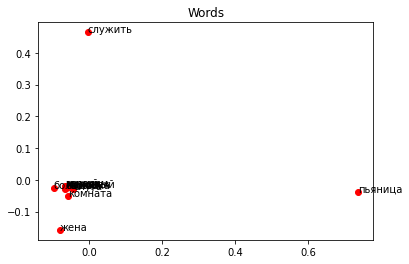

In [234]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [ ]:
# For the sake of keeping it interesting, I decided to use some of the words that I tested when I was checking the model, 
# in addition to a few extra related vocabulary words (see list above). The analysis of the words themselves seems to make
# sense, however, when plotted on the scatter plot above, it feels significantly less clear. This is also in addition to 
# the results of the first testing (the similarity functions in particular). As a result, I have a sneaking suspicion 
# that something has not gone correctly with the model training, and perhaps could use some different parameters. We could also 
# benefit from a different approach to the visualization (unfortunately, I did not have to do this)